In [3]:
# loading packages

import os
import pandas as pd
import numpy as np
from pandas import DataFrame

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

import seaborn as sns

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn import preprocessing



## Load raw data

In [5]:
# load raw data
DATA_FOLDER = './'
raw = pd.read_csv(os.path.join(DATA_FOLDER, 'countryriskdata.csv'))

# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))

Size of the dataset (row, col):  (122, 6)

First 5 rows
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          39  1.867  3.822       3.403
1    Algeria     DZ          34  2.213  4.160       4.202
2  Argentina     AR          36  1.957  4.568      -2.298
3    Armenia     AM          33  2.218  4.126       0.208
4  Australia     AU          79  1.465  8.244       2.471


## Simple exploratory analysis
### Print summary statistics
You may want to perform more exploratory analysis to determine which features/variables to include in your analysis.

In [6]:
# print summary statistics
print("\nSummary statistics\n", raw.describe())


Summary statistics
        Corruption       Peace       Legal  GDP Growth
count  122.000000  122.000000  122.000000  122.000000
mean    46.237705    2.003730    5.598861    2.372566
std     19.126397    0.447826    1.487328    3.241424
min     14.000000    1.192000    2.728000  -18.000000
25%     31.250000    1.684750    4.571750    1.432250
50%     40.000000    1.969000    5.274000    2.496000
75%     58.750000    2.280500    6.476750    4.080000
max     90.000000    3.399000    8.633000    7.958000


In [7]:
#normalize data
def normalize(column):
    raw1= raw[[column]]
    normal1= preprocessing.scale(raw1)
    return normal1

normalcorr= normalize("Corruption")
normalpeace= normalize("Peace")
normallegal= normalize("Legal")
normalgdp= normalize("GDP Growth")

#entering normal data into a new dataframe 
nor=DataFrame(normalcorr, columns=["Corruption"])
nor["Peace"]= normalpeace
nor["Legal"]= normallegal
nor["GDP Growth"]= normalgdp


print(nor)


    

     Corruption     Peace     Legal  GDP Growth
0     -0.379975 -0.306578 -1.199593    0.319207
1     -0.642472  0.469231 -0.971402    0.566720
2     -0.537473 -0.104778 -0.695954   -1.446841
3     -0.694971  0.480442 -0.994356   -0.670536
4      1.720000 -1.207951  1.785784    0.030493
..          ...       ...       ...         ...
117   -1.534961  1.451323 -1.754541   -6.310985
118   -0.694971 -0.219131 -0.451561    1.189065
119   -1.692459  3.128505 -1.938173   -3.764295
120   -0.432474 -0.494924 -0.460337    0.184143
121   -1.272464  0.713633 -1.241450   -0.573266

[122 rows x 4 columns]


### Do some pairwise scatter plots using seaborn

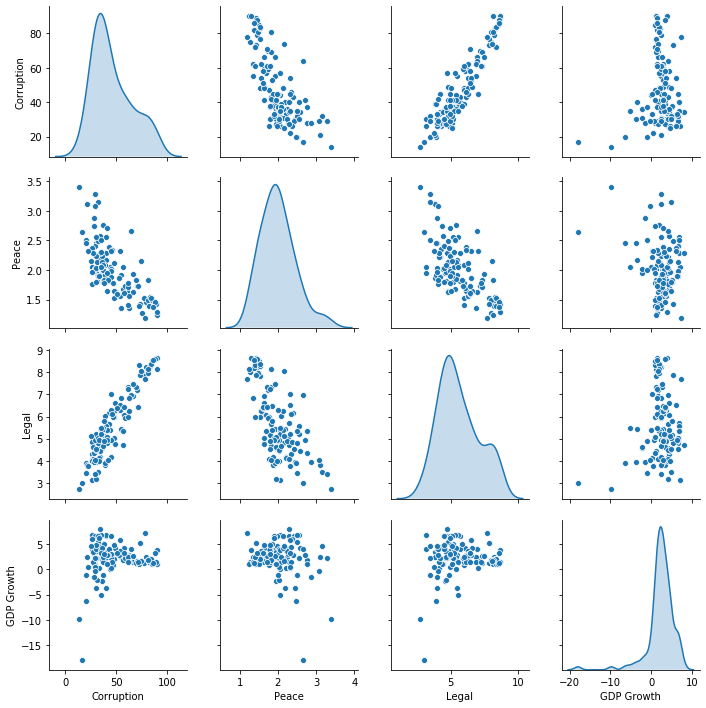

In [4]:
#this is with unormalized data
sns.pairplot(raw,vars=raw.columns[2:], diag_kind="kde")

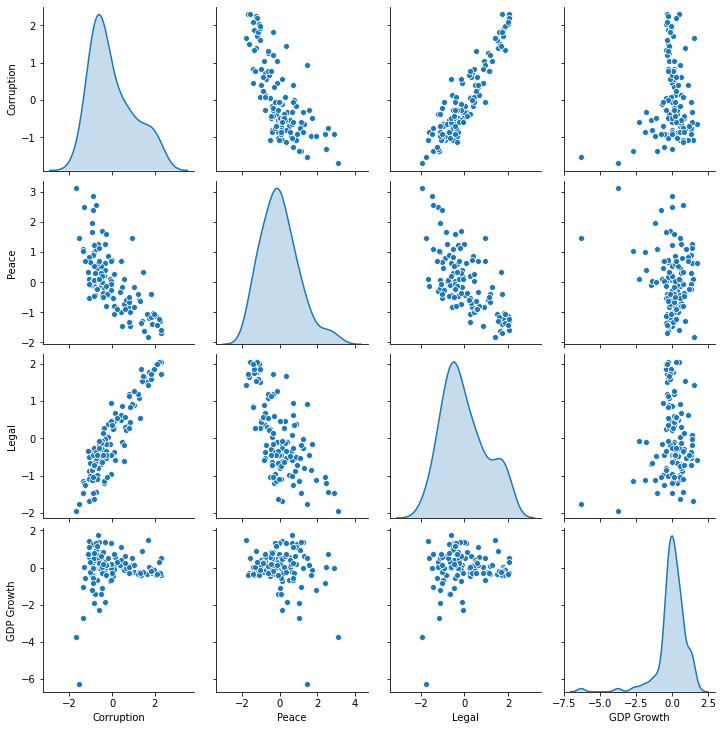

In [38]:
#analyze normalized data
sns.pairplot(nor,vars=nor.columns[:], diag_kind="kde")

In [39]:
#the normalized vs unnormalized data does not present a huge difference when it comes to the graphical interpretation

#displaying covariance matrix
print(nor.cov())

            Corruption     Peace     Legal  GDP Growth
Corruption    1.008264 -0.706266  0.931222    0.103360
Peace        -0.706266  1.008264 -0.657350   -0.201507
Legal         0.931222 -0.657350  1.008264    0.124460
GDP Growth    0.103360 -0.201507  0.124460    1.008264


In [ ]:
#corruption and legal are highly correlated
#none of the other variables are similaily correlated 

In [13]:
#displaying correlation matrix
print(nor.corr())

            Corruption     Peace     Legal  GDP Growth
Corruption    1.000000 -0.700477  0.923589    0.102513
Peace        -0.700477  1.000000 -0.651961   -0.199855
Legal         0.923589 -0.651961  1.000000    0.123440
GDP Growth    0.102513 -0.199855  0.123440    1.000000


In [ ]:
#once again as displayed in the covariance matrix corruption and legal have the most correlation (closest to one)
#the other variables are not close to one- are not correlated 

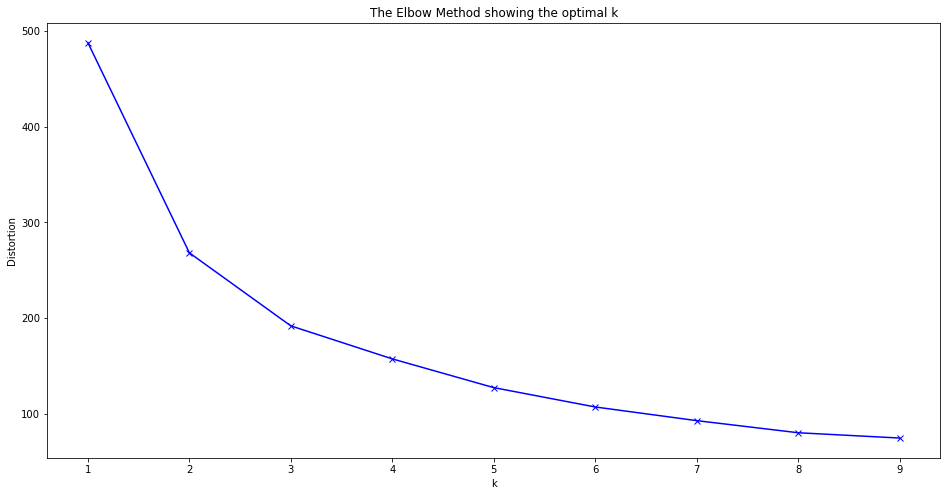

In [41]:
#k-means: displaying the ideal amount of clusters
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(nor)
    distortions.append(kmeanModel.inertia_)
    
#displaying the graoh for the elbow method to find the optimal amount of clusters

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
#the efficient number of clusters is subjective looking at the graph above
#k* is where the curve begins to flatten out 
#looking at this graph it appears to be 3

### K means with k=3

In [ ]:
#reporting the centres of the cluster

In [10]:
X = nor

k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=3 is 191.2476127621646
cluster centers:  [[-1.02746711  1.35221722 -1.05903285 -1.71998333]
 [-0.46443043  0.24897308 -0.43131685  0.36622553]
 [ 1.248887   -0.98585265  1.20121987  0.01395233]]
cluster labels:  [1 1 0 1 2 2 0 1 1 2 1 1 1 2 0 1 0 1 2 0 2 1 1 2 1 1 2 0 2 1 0 1 1 2 1 2 2
 1 1 2 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 0 1 2 1 1 2 1 1 2 1 1 1 1 1
 1 2 2 1 0 2 1 1 1 1 1 1 2 2 2 1 0 1 1 1 1 1 2 2 2 1 2 1 2 2 2 1 1 1 0 1 1
 1 0 2 2 2 2 0 1 0 1 0]


In [ ]:
#the three clusters appear to have about the same number of countries in it 
#the cluster centres variate between -2 and 2 

### List the result

Depending on the number of features you choose, you may also consider presenting your result using graphs.

In [ ]:
#reporting the countries in each cluster

In [11]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

                          Country Abbrev  Label
60                        Lebanon     LB      0
119                         Yemen     YE      0
117                     Venezuela     VE      0
112                       Ukraine     UA      0
108           Trinidad and Tobago     TT      0
90                         Russia     RO      0
78                        Nigeria     NG      0
30                        Ecuador     EC      0
27   Democratic Republic of Congo     CI      0
19                           Chad     TD      0
16                        Burundi     BI      0
14                         Brazil     BR      0
121                      Zimbabwe     ZW      0
2                       Argentina     AR      0
6                      Azerbaijan     AZ      0
67                     Mauritania     MR      1
81                       Pakistan     PK      1
80                           Oman     OM      1
77                      Nicaragua     NI      1
74                          Nepal     NP

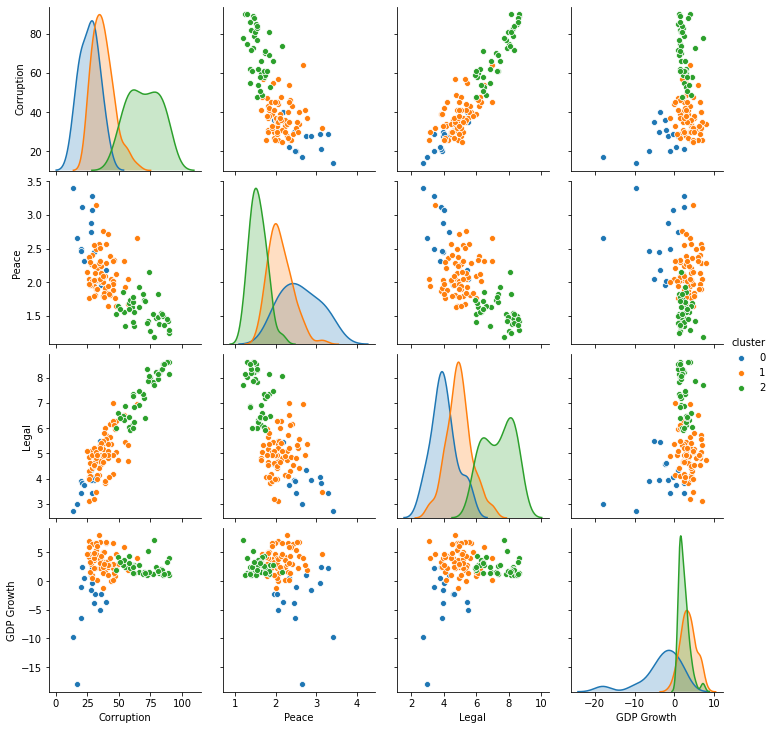

In [12]:
raw["cluster"] = y
sns.pairplot(raw,vars=nor.columns[:],hue="cluster")

In [ ]:
#looking at the graphs we can rank the three clusters according to risk:

#Most risky cluster:
#cluster 1 (0 in python index): corruption (ranks near 0- most corrupt), peace(ranks near 5- not peaceful), legal(ranks near 0- low rights), gdp growth( low to negative)
#Medium risk:
#cluster 2 (1 in python index): ranks in between cluster one and three, has medium risk 
#Least risky
#cluster 3(2 in python index): ranks low in corruption, high in peace and property rights, high gdp growth